

# **Home Guard Recruitment Dataset (2023)**

## **Dataset Overview**
This dataset contains information about the Home Guard personnel across various districts in Karnataka, India, for the year 2023. It provides details on the number of units, allotted strength, actual strength, gender distribution, and vacancies for each district. The data highlights recruitment gaps and can be used to analyze staffing patterns and identify districts with high vacancies.

---

## **Columns Description**
The dataset contains the following columns:

| **Column Name**               | **Description**                                                                 |
|--------------------------------|---------------------------------------------------------------------------------|
| `SL. NO.`                     | Serial number of the district in the dataset.                                   |
| `NAME OF THE DISTRICT`         | Name of the district in Karnataka.                                              |
| `NUMBER OF UNITS`              | Total number of Home Guard units in the district.                               |
| `ALLOTTED STRENGTH`            | Total number of personnel allotted to the district.                             |
| `NO. OF HOME GUARDS(men)`      | Number of male Home Guards currently employed in the district.                  |
| `NO. OF HOME GUARDS(women)`    | Number of female Home Guards currently employed in the district.                |
| `ACTUAL STRENGTH`              | Total number of Home Guards (men + women) currently employed in the district.   |
| `VACANCY`                      | Number of vacant positions in the district (difference between allotted and actual strength). |

---

## **Key Insights from the Dataset**
1. **District-Wise Strength**:
   - The dataset shows how many personnel are allotted versus how many are actually employed in each district.
   - It highlights districts with recruitment gaps (vacancies).

2. **Gender Distribution**:
   - The dataset provides a breakdown of male and female Home Guards for each district.
   - This can be used to analyze gender diversity within the Home Guards.

3. **Vacancy Analysis**:
   - Vacancies are calculated as the difference between allotted strength and actual strength.
   - Districts with high vacancies can be prioritized for recruitment drives.

4. **Performance Metrics**:
   - The percentage of allotted strength filled (`PERCENTAGE_FILLED`) is derived from the actual strength divided by allotted strength.
   - This metric indicates how well each district has filled its allotted positions.

---

## **Sample Data**

| SL. NO. | NAME OF THE DISTRICT | NUMBER OF UNITS | ALLOTTED STRENGTH | NO. OF HOME GUARDS(men) | NO. OF HOME GUARDS(women) | ACTUAL STRENGTH | VACANCY |
|---------|-----------------------|-----------------|--------------------|--------------------------|--------------------------|-----------------|---------|
| 1       | Bengaluru North       | 18              | 1850               | 834                      | 786                      | 1620            | 230     |
| 2       | Bengaluru Rural       | 15              | 1650               | 846                      | 411                      | 1257            | 393     |
| 3       | Bengaluru South       | 15              | 1850               | 1131                     | 708                      | 1839            | 11      |

---

## **Data Analysis and Visualizations**
### Key Analyses Performed:
1. **Allotted vs Actual Strength Comparison**:
   - Bar plot comparing allotted strength versus actual strength for each district.
2. **Top Vacancies**:
   - Bar plot showing districts with the highest number of vacancies.
3. **Gender Distribution**:
   - Pie chart displaying the overall percentage of male and female Home Guards across all districts.
4. **Vacancy vs Actual Strength**:
   - Scatter plot illustrating the relationship between actual strength and vacancies across districts.
5. **Percentage Filled Distribution**:
   - Histogram showing how well districts have filled their allotted positions.

### Insights from Visualizations:
- Certain districts like Kodagu and Mandya have high vacancy rates, indicating a need for focused recruitment efforts.
- Gender diversity varies significantly across districts, with some having no women Home Guards at all.
- The majority of districts have filled less than 90% of their allotted positions.

---

## **Potential Use Cases**
1. **Recruitment Planning**:
   - Identify districts with high vacancies to prioritize recruitment efforts.
2. **Gender Diversity Initiatives**:
   - Use gender distribution data to promote balanced representation in Home Guard personnel.
3. **Performance Monitoring**:
   - Track how well districts are meeting their allotted quotas over time.

---

## **Limitations**
1. The dataset only covers Karnataka; insights may not generalize to other states or regions.
2. Some columns may have missing or incorrect values due to data entry errors.
3. The dataset does not provide historical trends or reasons for vacancies.

---

This dataset provides valuable insights into staffing patterns within Karnataka's Home Guard organization and serves as a foundation for data-driven decision-making in recruitment and resource allocation.

---
https://www.data.gov.inhttps://www.data.gov.in/

In [30]:
import pandas as pd

data = pd.read_csv(
    "home_guard_2023.csv", 
    thousands=',',  # Handles numbers with commas (e.g., 1,850 → 1850)
    skipinitialspace=True  # Removes spaces after commas
)

data.columns = data.columns.str.strip()

numeric_cols = [
    'NUMBER OF UNITS', 'ALLOTTED STRENGTH', 
    'NO. OF HOME GUARDS(men)', 'NO. OF HOME GUARDS(women)',
    'ACTUAL STRENGTH', 'VACANCY'
]
data[numeric_cols] = data[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Display the loaded data
print("data loaded successfully.")
# print(data)


data loaded successfully.


# 1. Allotted vs Actual Strength Comparison

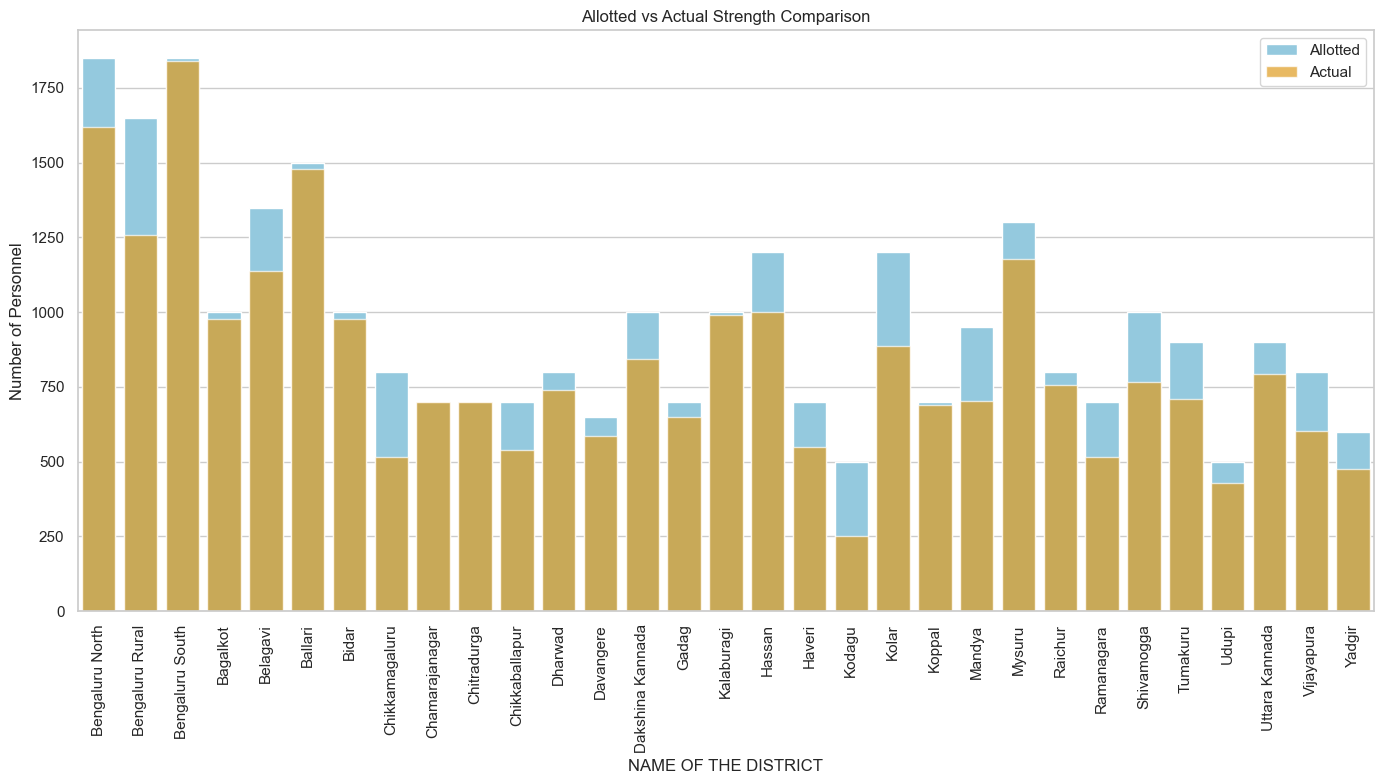

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12


plt.figure(figsize=(14, 8))
ax = sns.barplot(x='NAME OF THE DISTRICT', y='ALLOTTED STRENGTH', data=data, color='skyblue', label='Allotted')
sns.barplot(x='NAME OF THE DISTRICT', y='ACTUAL STRENGTH', data=data, color='orange', alpha=0.7, label='Actual')
plt.title('Allotted vs Actual Strength Comparison')
plt.xticks(rotation=90)
plt.ylabel('Number of Personnel')
plt.legend()
plt.tight_layout()
plt.savefig('strength_comparison.png', dpi=300)
plt.show()
plt.close()


# 2. Top 10 Districts with Highest Vacancies


C:\Users\soumy\AppData\Local\Temp\ipykernel_9308\843103664.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='NAME OF THE DISTRICT', x='VACANCY', data=top_vacancies, palette='viridis')


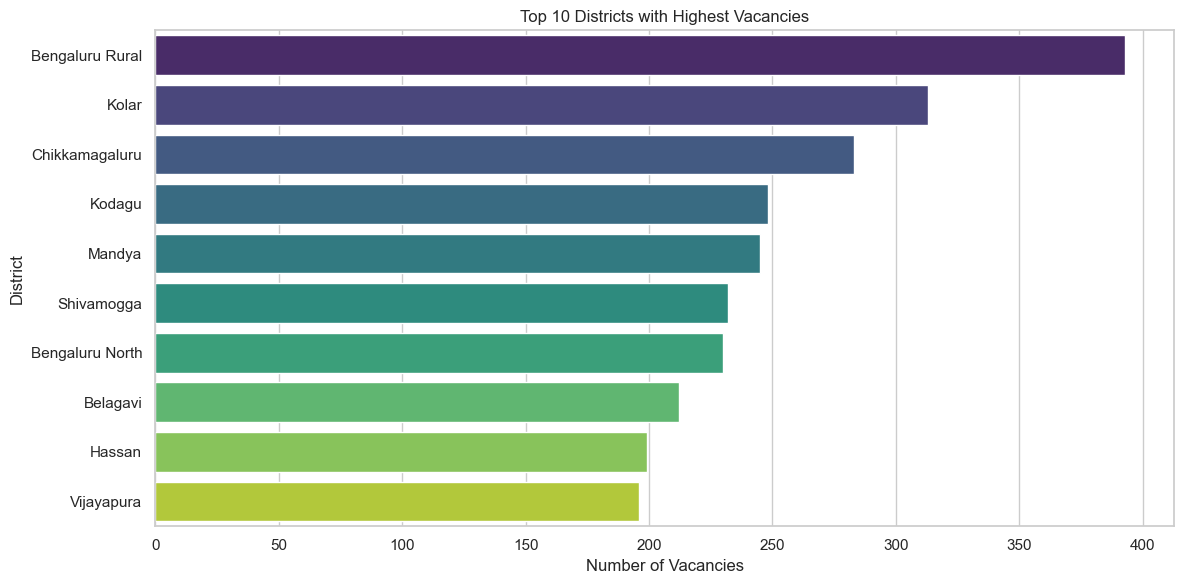

In [12]:

top_vacancies = data.nlargest(10, 'VACANCY')
plt.figure(figsize=(12, 6))
sns.barplot(y='NAME OF THE DISTRICT', x='VACANCY', data=top_vacancies, palette='viridis')
plt.title('Top 10 Districts with Highest Vacancies')
plt.xlabel('Number of Vacancies')
plt.ylabel('District')
plt.tight_layout()
plt.savefig('top_vacancies.png', dpi=300)
plt.show()
plt.close()



# 3. Gender Distribution Pie Chart


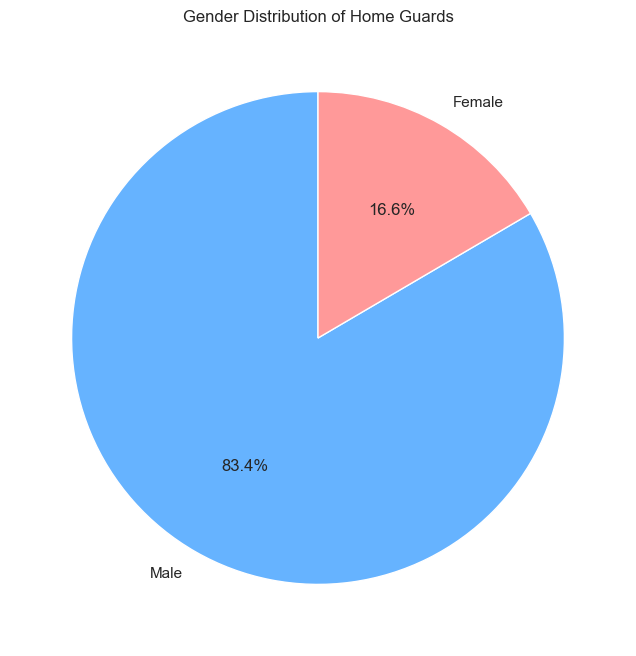

In [14]:

gender_totals = [total_men, total_women]
plt.figure(figsize=(8, 8))
plt.pie(gender_totals, labels=['Male', 'Female'], autopct='%1.1f%%',
        colors=['#66b3ff','#ff9999'], startangle=90)
plt.title('Gender Distribution of Home Guards')
plt.savefig('gender_distribution.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()



# 4. Vacancy vs Actual Strength Scatter Plot


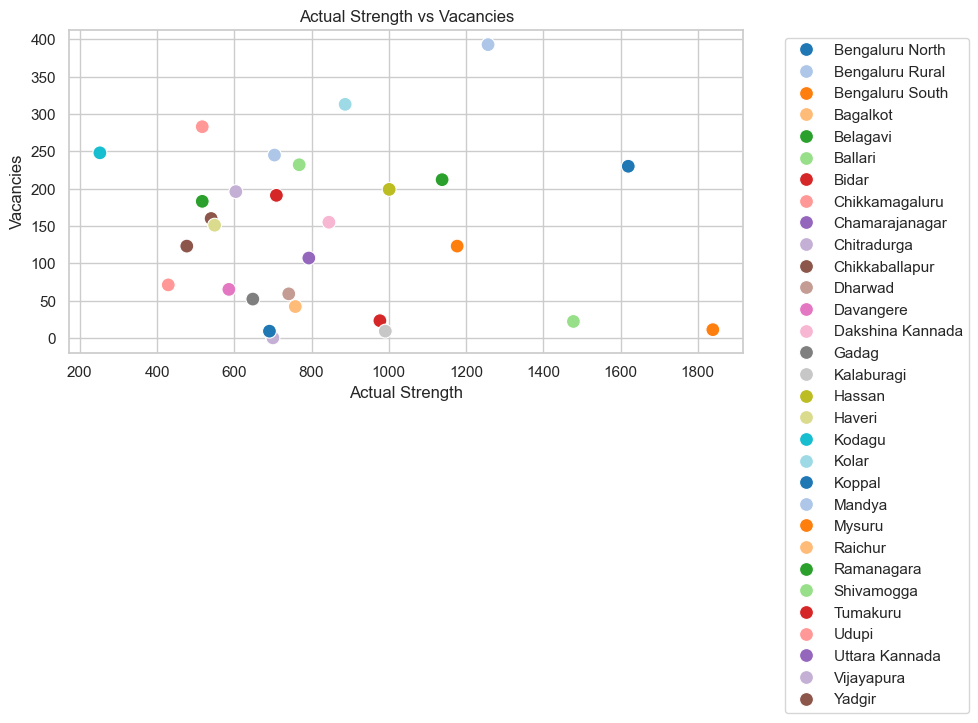

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ACTUAL STRENGTH', y='VACANCY', data=data,
                hue='NAME OF THE DISTRICT', s=100, palette='tab20')
plt.title('Actual Strength vs Vacancies')
plt.xlabel('Actual Strength')
plt.ylabel('Vacancies')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('strength_vs_vacancy.png', dpi=300)
plt.show()
plt.close()



# 5. Percentage Filled Distribution


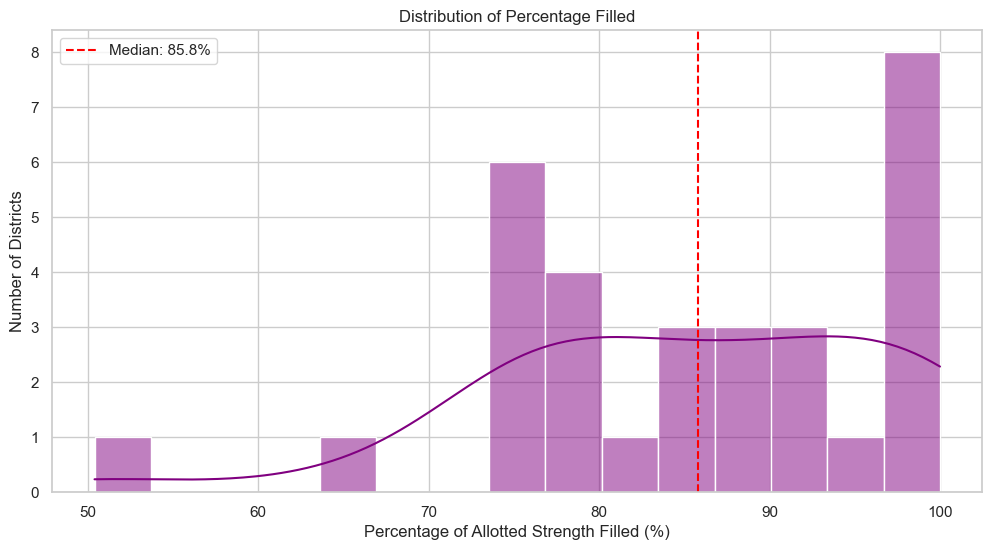


Plots saved as:
- strength_comparison.png
- top_vacancies.png
- gender_distribution.png
- strength_vs_vacancy.png
- percentage_filled_distribution.png


In [18]:
plt.figure(figsize=(12, 6))
sns.histplot(data['PERCENTAGE_FILLED'], bins=15, kde=True, color='purple')
plt.title('Distribution of Percentage Filled')
plt.xlabel('Percentage of Allotted Strength Filled (%)')
plt.ylabel('Number of Districts')
plt.axvline(data['PERCENTAGE_FILLED'].median(), color='red', linestyle='--', 
            label=f'Median: {data["PERCENTAGE_FILLED"].median():.1f}%')
plt.legend()
plt.savefig('percentage_filled_distribution.png', dpi=300)
plt.show()
plt.close()

print("\nPlots saved as:")
print("- strength_comparison.png")
print("- top_vacancies.png")
print("- gender_distribution.png")
print("- strength_vs_vacancy.png")
print("- percentage_filled_distribution.png")